In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_data_dir = pathlib.Path("./dataset2/train/train/")
print(train_data_dir)

test_data_dir = pathlib.Path("./dataset2/test/test/")
print(test_data_dir)

dataset2\train\train
dataset2\test\test


In [10]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.3,
)

validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        './dataset2/train/train/',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        './dataset2/test/test/',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
# create model structure
emotion_model = Sequential([
    #block-1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #block-2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    #block-3
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    #block-4
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    #block-5
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

emotion_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,epsilon=1e-06),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

emotion_model.summary()
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

In [12]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


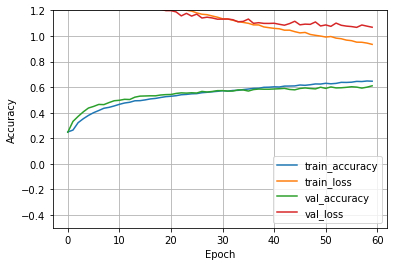

In [13]:
plt.grid()
plt.plot(emotion_model_info.history['accuracy'], label='train_accuracy')
plt.plot(emotion_model_info.history['loss'], label = 'train_loss')
plt.plot(emotion_model_info.history['val_accuracy'], label='val_accuracy')
plt.plot(emotion_model_info.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

In [14]:
emotion_model.save('facial_emotions_model.h5')

(48, 48, 1)


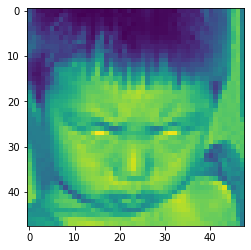

In [16]:
from tensorflow.keras.preprocessing import image
img_path='./dataset2/train/train/angry/Training_10118481.jpg'
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [17]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
result=emotion_model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 184ms/step
[1.0000000e+00 0.0000000e+00 1.1572548e-09 5.1425108e-25 2.0038134e-32
 3.7350674e-12 1.1394039e-10]
The person facial emotion is: Angry
